In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

#download data
data= fetch_mldata('MNIST original', data_home=".")

In [60]:
x=data.data
mnist=np.reshape(x,(len(x),28,28))
shuffle = np.random.permutation(len(mnist[:,0,0]))
mnist=np.asarray(mnist[shuffle,:,:])

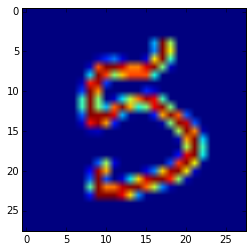

In [61]:
plt.imshow(mnist[0])

In [62]:
# learning paras.
loop = 1000       # def: 1000
alpha_base = 1.0  # def: 1.0
(sigma_min, sigma_max) = (0.5, 3.0)   # def: (0.5, 3.0)

# network paras.
img_w = 28  # fix: 28
mod_w = 30   # def: 5
rf_w = 28    # def: 6

# gaussian func.
def gaussian(x, mu, sigma):
    return np.exp((x - mu)**2 / (-2 * sigma**2))

# calc some paras.
rf_len = rf_w * rf_w
rf_idx_0 = img_w / 2 - rf_w / 2
rf_idx_1 = rf_idx_0 + rf_w
yy, xx = np.ogrid[0:mod_w, 0:mod_w]
sigma_mod = sigma_max - sigma_min

In [63]:
w = np.random.rand(mod_w, mod_w, rf_len) # init with random values
w /= np.sqrt(np.sum(w**2, axis=2))[:, :, np.newaxis] # normalization

# main loop for learning
for i in xrange(loop):
    x = mnist[i, rf_idx_0:rf_idx_1, rf_idx_0:rf_idx_1].ravel()
    y = np.dot(w, x)
    winner = np.unravel_index(np.argmax(y), (mod_w, mod_w))
    
    # calc modulation
    alpha = alpha_base * (loop - i) / loop
    sigma = sigma_mod * (loop - i) / loop + sigma_min
    dist = np.sqrt((xx - winner[1])**2 + (yy - winner[0])**2)
    mod = gaussian(dist, 0, sigma)[:, :, np.newaxis] # Winners Share All
    # plt.imshow(distance, cmap=plt.cm.hot)
    
    # learning 
    w = (1.0 - alpha) * w + alpha * mod * x # update
    w /= np.sqrt(np.sum(w**2, axis=2))[:, :, np.newaxis] # normalization

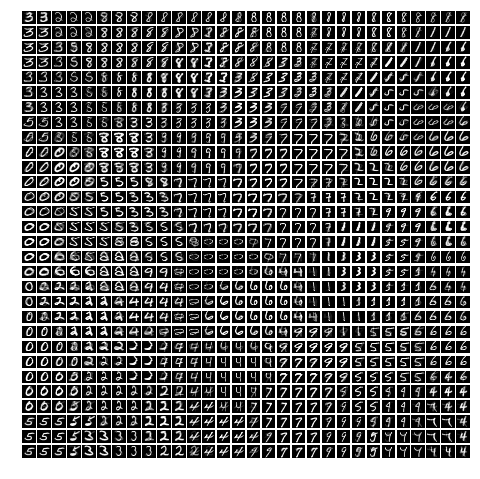

In [64]:
plt.figure(figsize=(8, 8), dpi=80)
for j in xrange(mod_w): # vertical
    for i in xrange(mod_w): #horizontal
        plt.subplot(mod_w, mod_w, i * mod_w + j + 1)
        fig = plt.imshow(np.reshape(w[i, j, :], (rf_w, -1)), 
                         cmap=plt.cm.gray) # interpolation='none')
        plt.axis('off')
plt.show()